# IRIS Flower Classification

## Objectives:
- The objectives of this project is **to experiment with different classification methods to see which yields the highest accuracy  and which one is the best model**

## Steps included in this project:
1. Importing Libraries
2. Loading Data
3. Understanding Data
4. Visualization(Exploring Variables_Data Anylasis)
5. Data Preprocessing
6. Feature Selection
7. Preparing Data for Modelling
8. Applying different models

# 1) Importing Libaries

In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid") # Set the style of seaborn

# 2) Load the data

In [2]:
# Load the dataset 

iris = pd.read_csv("IRIS.csv")
iris.head() #Display the 1st five rows of the DataFrame to inspect the data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3) Understanding the data

In [3]:
# Display the shape of the dataset
iris.shape

(150, 5)

In [4]:
# Display information about dataset including data types and missing values
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Statistical description of numerical variables 
iris.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
duplicates = iris.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 3


In [7]:
#drop duplicates
iris = iris.drop_duplicates()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.shape

(147, 5)

In [9]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


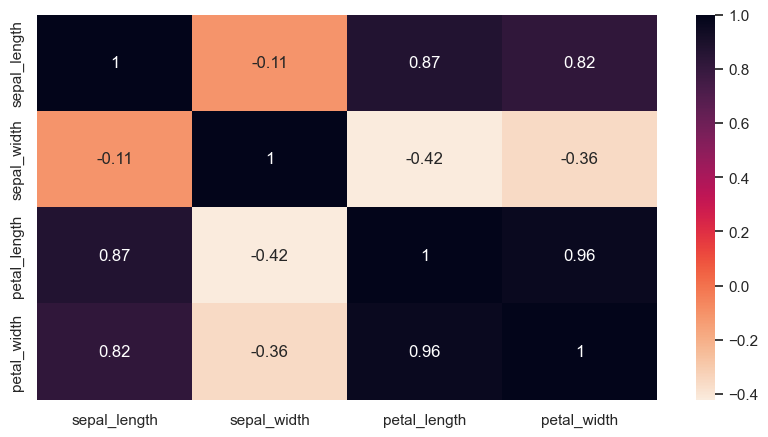

In [10]:
plt.figure(figsize = (10,5))
sns.heatmap(corr , annot = True, cmap = 'rocket_r')
plt.show()

**From the plot**
- Petal width and petal length have high correlations. 
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

# 4) Visualization(Exploring Variables_Data Anylasis)

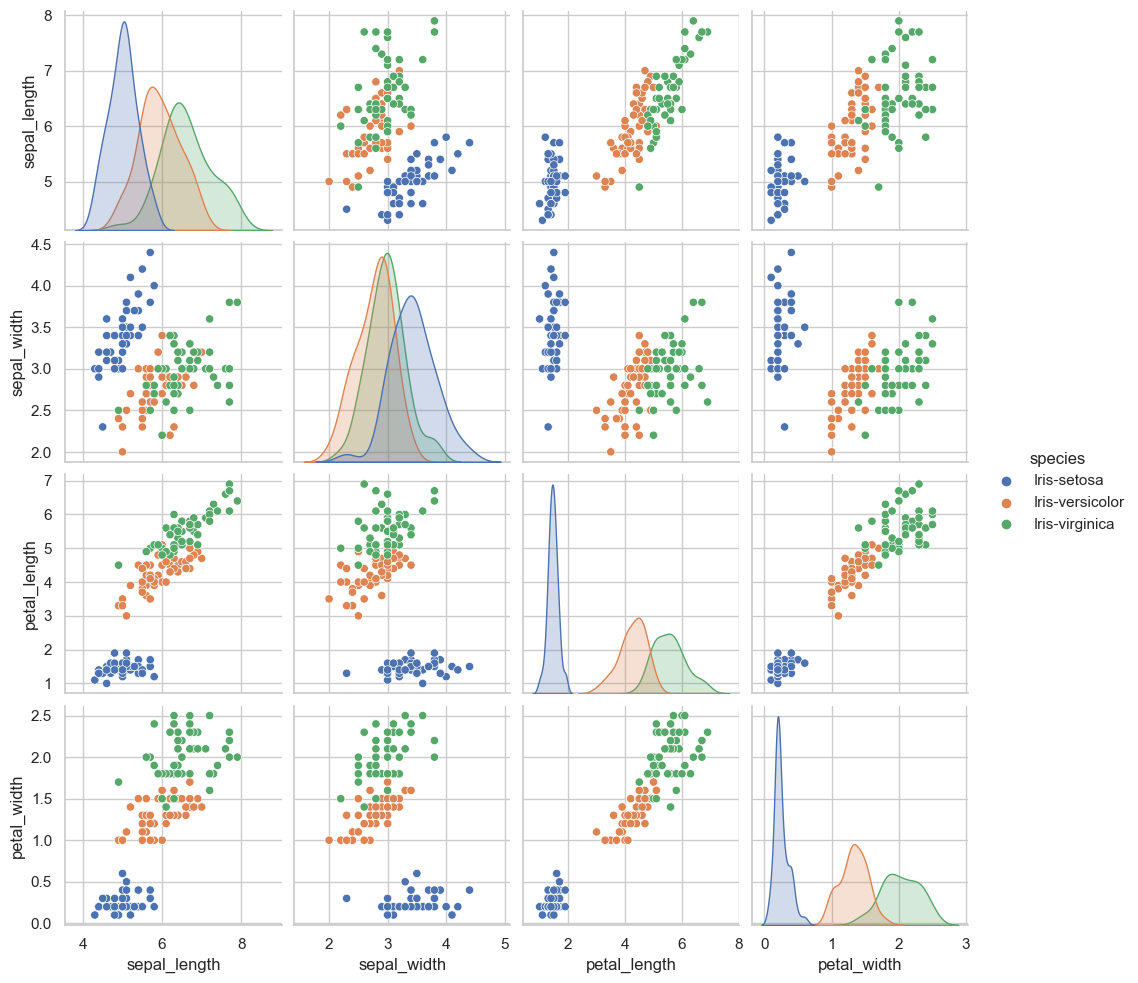

In [11]:
# Pair Plot 

sns.pairplot(data=iris, hue='species')
plt.show()

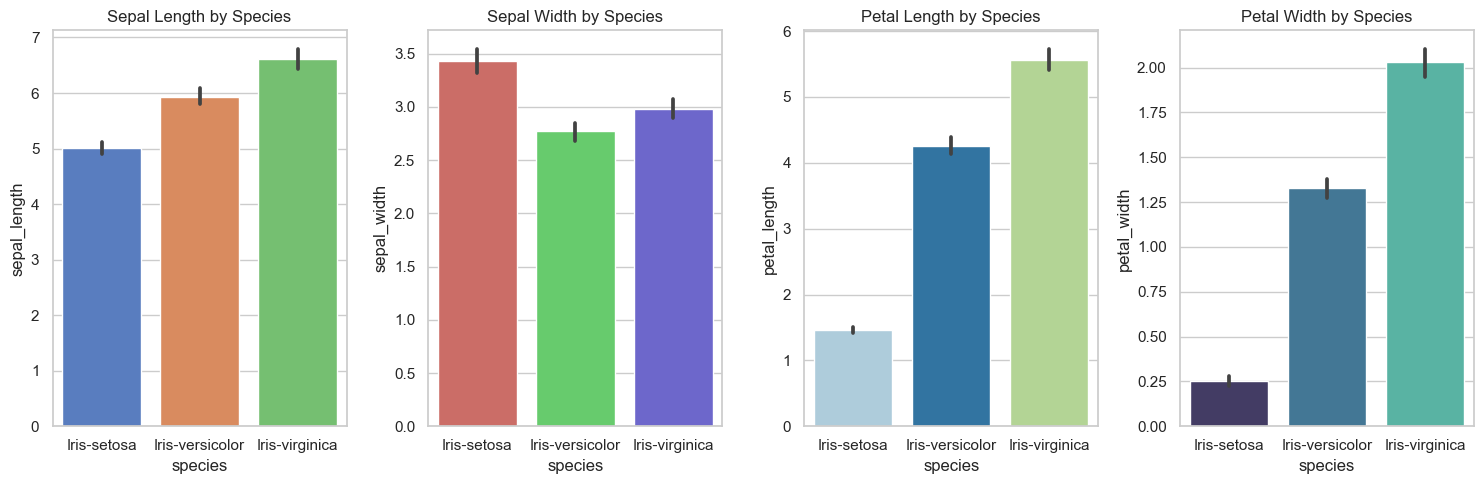

In [12]:
# Set up the subplots
plt.figure(figsize=(15,5))

# Bar plot for sepal_length
plt.subplot(1, 4, 1)
sns.barplot(x='species', y='sepal_length', data=iris, palette='muted')
plt.title('Sepal Length by Species')

# Bar plot for sepal_width
plt.subplot(1, 4, 2)
sns.barplot(x='species', y='sepal_width', data=iris, palette='hls')
plt.title('Sepal Width by Species')

# Bar plot for petal_length
plt.subplot(1, 4, 3)
sns.barplot(x='species', y='petal_length', data=iris, palette='Paired')
plt.title('Petal Length by Species')

# Bar plot for petal_width
plt.subplot(1, 4, 4)
sns.barplot(x='species', y='petal_width', data=iris,palette='mako')
plt.title('Petal Width by Species')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
- And iris virginica is the longest flower and iris setosa is the shortest.

###  Comparing Sepal Length & Sepal Width and Petal Length & Petal Width

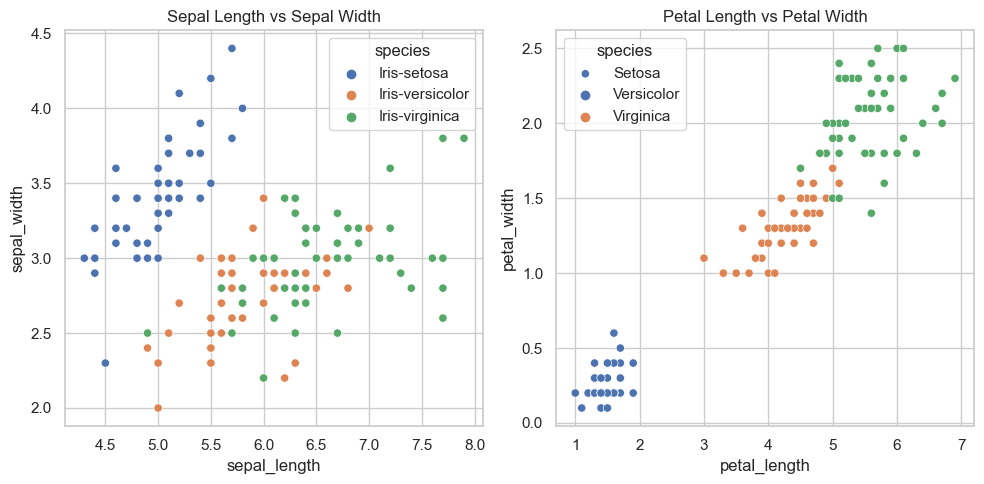

In [13]:
# Set up the subplots
plt.figure(figsize=(10,5))

# # Scatter plot for sepal_length vs sepal_width
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length vs Sepal Width')

# Scatter plot for petal_length vs petal_width
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.title('Petal Length vs Petal Width')
           
           
# Placing Legend outside the Figure
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'], title='species')
           
# Adjust layout
plt.tight_layout()
 
plt.show()

**From the plot of Sepal Length & Sepal Width,**
- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.

**From the plot of Petal Length & Petal Width,**
- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

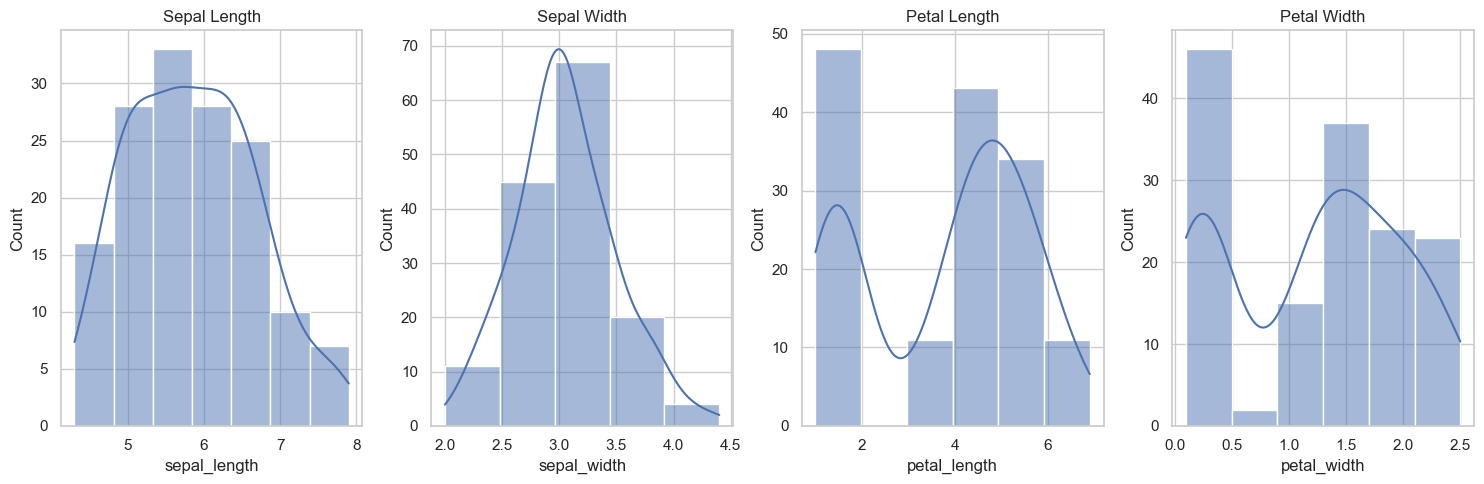

In [14]:
# Set up the subplots
plt.figure(figsize=(15, 5))

# Histogram for sepal_length
plt.subplot(1, 4, 1)
sns.histplot(x='sepal_length', data=iris, bins=7, kde=True)
plt.title('Sepal Length')

# Histogram for sepal_width
plt.subplot(1, 4, 2)
sns.histplot(x='sepal_width', data=iris, bins=5, kde=True)
plt.title('Sepal Width')

# Histogram for petal_length
plt.subplot(1, 4, 3)
sns.histplot(x='petal_length', data=iris, bins=6, kde=True)
plt.title('Petal Length')

# Histogram for petal_width
plt.subplot(1, 4, 4)
sns.histplot(x='petal_width', data=iris, bins=6, kde=True)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**From the above plot,** 

- The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
- The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
- The highest frequency of the petal length is around 50 which is between 1 and 2
- The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

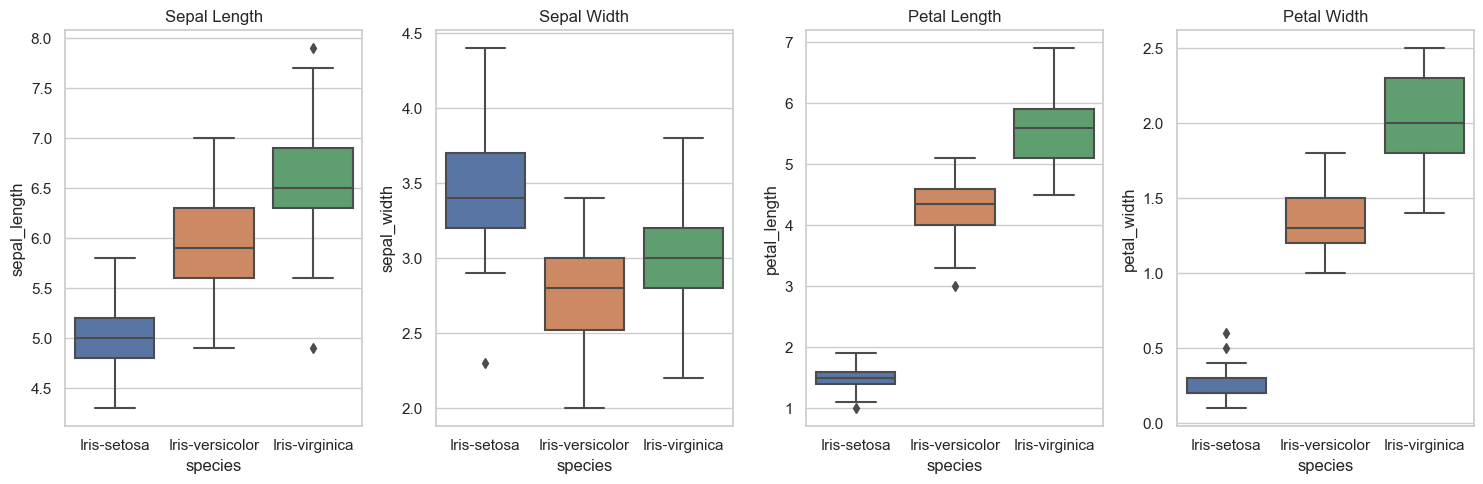

In [15]:
# Set up the subplots
plt.figure(figsize=(15, 5))

# Box plot for sepal_length with hue
plt.subplot(1, 4, 1)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Length')

# Box plot for sepal_width with hue
plt.subplot(1, 4, 2)
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Sepal Width')

# Box plot for petal_length with hue
plt.subplot(1, 4, 3)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length')

# Box plot for petal_width with hue
plt.subplot(1, 4, 4)
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**From the above graph,**

- Species Setosa has the smallest features 
- Species Versicolor has the average features.
- Species Virginica has the highest features

# 5) Data Preprocessing

### (I) Missing Value Treatmnet

In [16]:
## Checking Missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### (II) Encoding part

In [17]:
iris['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [18]:
# Label Encoder

iris['species'] = iris['species'].astype('category')
iris['species'] = iris['species'].cat.codes

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (III) Handling Outlier

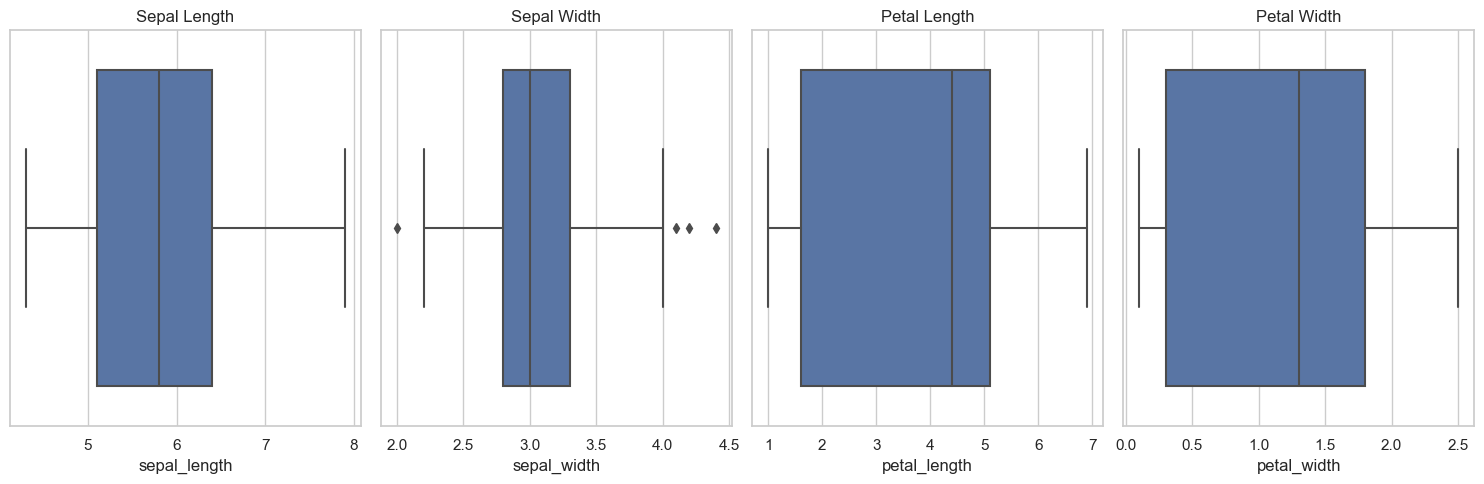

In [20]:
# Set up the subplots
plt.figure(figsize=(15, 5))

# Box plot for sepal_length
plt.subplot(1, 4, 1)
sns.boxplot(x='sepal_length', data=iris)
plt.title('Sepal Length')

# Box plot for sepal_width
plt.subplot(1, 4, 2)
sns.boxplot(x='sepal_width', data=iris)
plt.title('Sepal Width')

# Box plot for petal_length
plt.subplot(1, 4, 3)
sns.boxplot(x='petal_length', data=iris)
plt.title('Petal Length')

# Box plot for petal_width
plt.subplot(1, 4, 4)
sns.boxplot(x='petal_width', data=iris)
plt.title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
sw_q1 = iris['sepal_width'].quantile(0.25)
sw_q3 = iris['sepal_width'].quantile(0.75)
sw_iqr =   sw_q3 - ns_q1
sw_upper = sw_q3 + 1.5 * sw_iqr
sw_lower = sw_q1 - 1.5 * sw_iqr

ad['sepal_width'] = np.where(iris['sepal_width'] > sw_upper,sw_upper,
                    np.where(iris['sepal_width'] < sw_lower,sw_lower,
                             iris['sepal_width']) )

NameError: name 'ns_q1' is not defined

In [ ]:
# Set up the subplots
plt.figure(figsize=(15, 5))

sns.boxplot(x='sepal_width', data=iris)
plt.title('Sepal Width')

# 6) Feature Selection

In [ ]:
# Split the dataset into features (X) and target variable (y)
x = iris.drop('species', axis=1)
y = iris['species']

# 7) Preparing Data for Modelling

In [ ]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling the numeric variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 8) Applying Different Models

Here, we are using the folowing classifier models:

1) Logistic Regression
2) K – Nearest Neighbour (KNN)
3) Support Vector Machine (SVM)
4) Naive Bayes classifier
5) Random Forest

In [ ]:
#importing libraries for the classifier models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Initialize Logistic Regression model
model_1 = LogisticRegression()

# Train the model
model_1.fit(x_train, y_train)

# Make predictions on the test set
y_pred_1 = model_1.predict(x_test)

# Evaluate the model
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
classification_report_1 = classification_report(y_test, y_pred_1)
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Display results
print("Confusion Matrix:\n", confusion_matrix_1)
print("\nClassification Report:\n", classification_report_1)
print("\nAccuracy Score:", accuracy_1)

In [ ]:
# Cross Validation

test_accuracy_1 = cross_val_score(model_1, x_test, y_test, cv=10)
print("Test Accuracy after CV :", test_accuracy_1.mean())

In [ ]:
# Initialize K – Nearest Neighbour Classifier model
model_2 = KNeighborsClassifier()

# Train the model
model_2.fit(x_train, y_train)

# Make predictions on the test set
y_pred_2 = model_2.predict(x_test)

# Evaluate the model
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
classification_report_2 = classification_report(y_test, y_pred_2)
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Display results
print("Confusion Matrix:\n", confusion_matrix_2)
print("\nClassification Report:\n", classification_report_2)
print("\nAccuracy Score:", accuracy_2)

In [ ]:
# Cross Validation

test_accuracy_2 = cross_val_score(model_2, x_test, y_test, cv=10)
print("Test Accuracy after CV :", test_accuracy_2.mean())

In [ ]:
# Initialize Support Vector Machine Classifier model
model_3 = SVC()

# Train the model
model_3.fit(x_train, y_train)

# Make predictions on the test set
y_pred_3 = model_3.predict(x_test)

# Evaluate the model
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
classification_report_3 = classification_report(y_test, y_pred_3)
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Display results
print("Confusion Matrix:\n", confusion_matrix_3)
print("\nClassification Report:\n", classification_report_3)
print("\nAccuracy Score:", accuracy_3)

In [ ]:
# Cross Validation

test_accuracy_3 = cross_val_score(model_3, x_test, y_test, cv=10)
print("Test Accuracy after CV :", test_accuracy_3.mean())

In [ ]:
# Initialize Naive Bayes classifier model
model_4 = GaussianNB()

# Train the model
model_4.fit(x_train, y_train)

# Make predictions on the test set
y_pred_4 = model_4.predict(x_test)

# Evaluate the model
confusion_matrix_4 = confusion_matrix(y_test, y_pred_4)
classification_report_4 = classification_report(y_test, y_pred_4)
accuracy_4 = accuracy_score(y_test, y_pred_4)

# Display results
print("Confusion Matrix:\n", confusion_matrix_4)
print("\nClassification Report:\n", classification_report_4)
print("\nAccuracy Score:", accuracy_4)

In [ ]:
# Cross Validation

test_accuracy_4 = cross_val_score(model_4, x_test, y_test, cv=10)
print("Test Accuracy after CV :", test_accuracy_4.mean())

In [ ]:
# Initialize random Forest Classifier model
model_5 = RandomForestClassifier()

# Train the model
model_5.fit(x_train, y_train)   

# Make predictions on the test set
y_pred_5 = model_5.predict(x_test)

# Evaluate the model
confusion_matrix_5 = confusion_matrix(y_test, y_pred_5)
classification_report_5 = classification_report(y_test, y_pred_5)
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Display results
print("Confusion Matrix:\n", confusion_matrix_5)
print("\nClassification Report:\n", classification_report_5)
print("\nAccuracy Score:", accuracy_5)

In [ ]:
# Cross Validation

test_accuracy_5 = cross_val_score(model_5, x_test, y_test, cv=10)
print("Test Accuracy after CV :", test_accuracy_4.mean())

In [ ]:
# Result for traning Accuracy after CV

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'K – Nearest Neighbour (KNN)', 'Support Vector Machine (SVM)', 'Naive Bayes classifier', 'Random Forest classifier'],
    'Score': [0.9333333333333332, 0.8333333333333333, 0.8666666666666666, 0.9666666666666666, 0.9666666666666666 ]})

# Convert 'Score' to numeric to ensure proper sorting
results['Score'] = pd.to_numeric(results['Score'])

result_iris= results.sort_values(by='Score', ascending=True)

result_iris

In [ ]:
# Plotting a pie chart

plt.figure(figsize=(8, 6))
plt.pie(result_iris['Score'], labels= result_iris['Model'], autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution based on Scores', color='red')  # Set the title color here
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

### We are getting better results for K – Nearest Neighbour (KNN) model with Cross-Validation